In [1]:
import multiprocessing
multiprocessing.set_start_method("fork")

In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import arviz as az
import pandas as pd
import os
import seaborn as sns
import scipy.signal as ssig

import ringdown as rd
import wfutils

sns.set(context='notebook', palette='colorblind')

In [4]:
fit = az.from_netcdf("myfit.nc")

In [5]:
az.summary(fit, var_names=['A', 'M', 'chi', 'f', 'tau'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
A[0],0.000,0.000,0.000,0.000,0.000,0.000,2164.0,2908.0,1.0
A[1],0.000,0.000,0.000,0.000,0.000,0.000,2770.0,3420.0,1.0
A[2],0.000,0.000,0.000,0.000,0.000,0.000,2057.0,2808.0,1.0
A[3],0.000,0.000,0.000,0.000,0.000,0.000,1771.0,2246.0,1.0
A[4],0.000,0.000,0.000,0.000,0.000,0.000,2162.0,2621.0,1.0
A[5],0.000,0.000,0.000,0.000,0.000,0.000,2062.0,3012.0,1.0
A[6],0.000,0.000,0.000,0.000,0.000,0.000,2095.0,2755.0,1.0
A[7],0.000,0.000,0.000,0.000,0.000,0.000,1954.0,2613.0,1.0
M,70.609,3.249,64.697,76.680,0.082,0.059,1504.0,1568.0,1.0
chi,0.687,0.062,0.576,0.792,0.002,0.001,1237.0,828.0,1.0


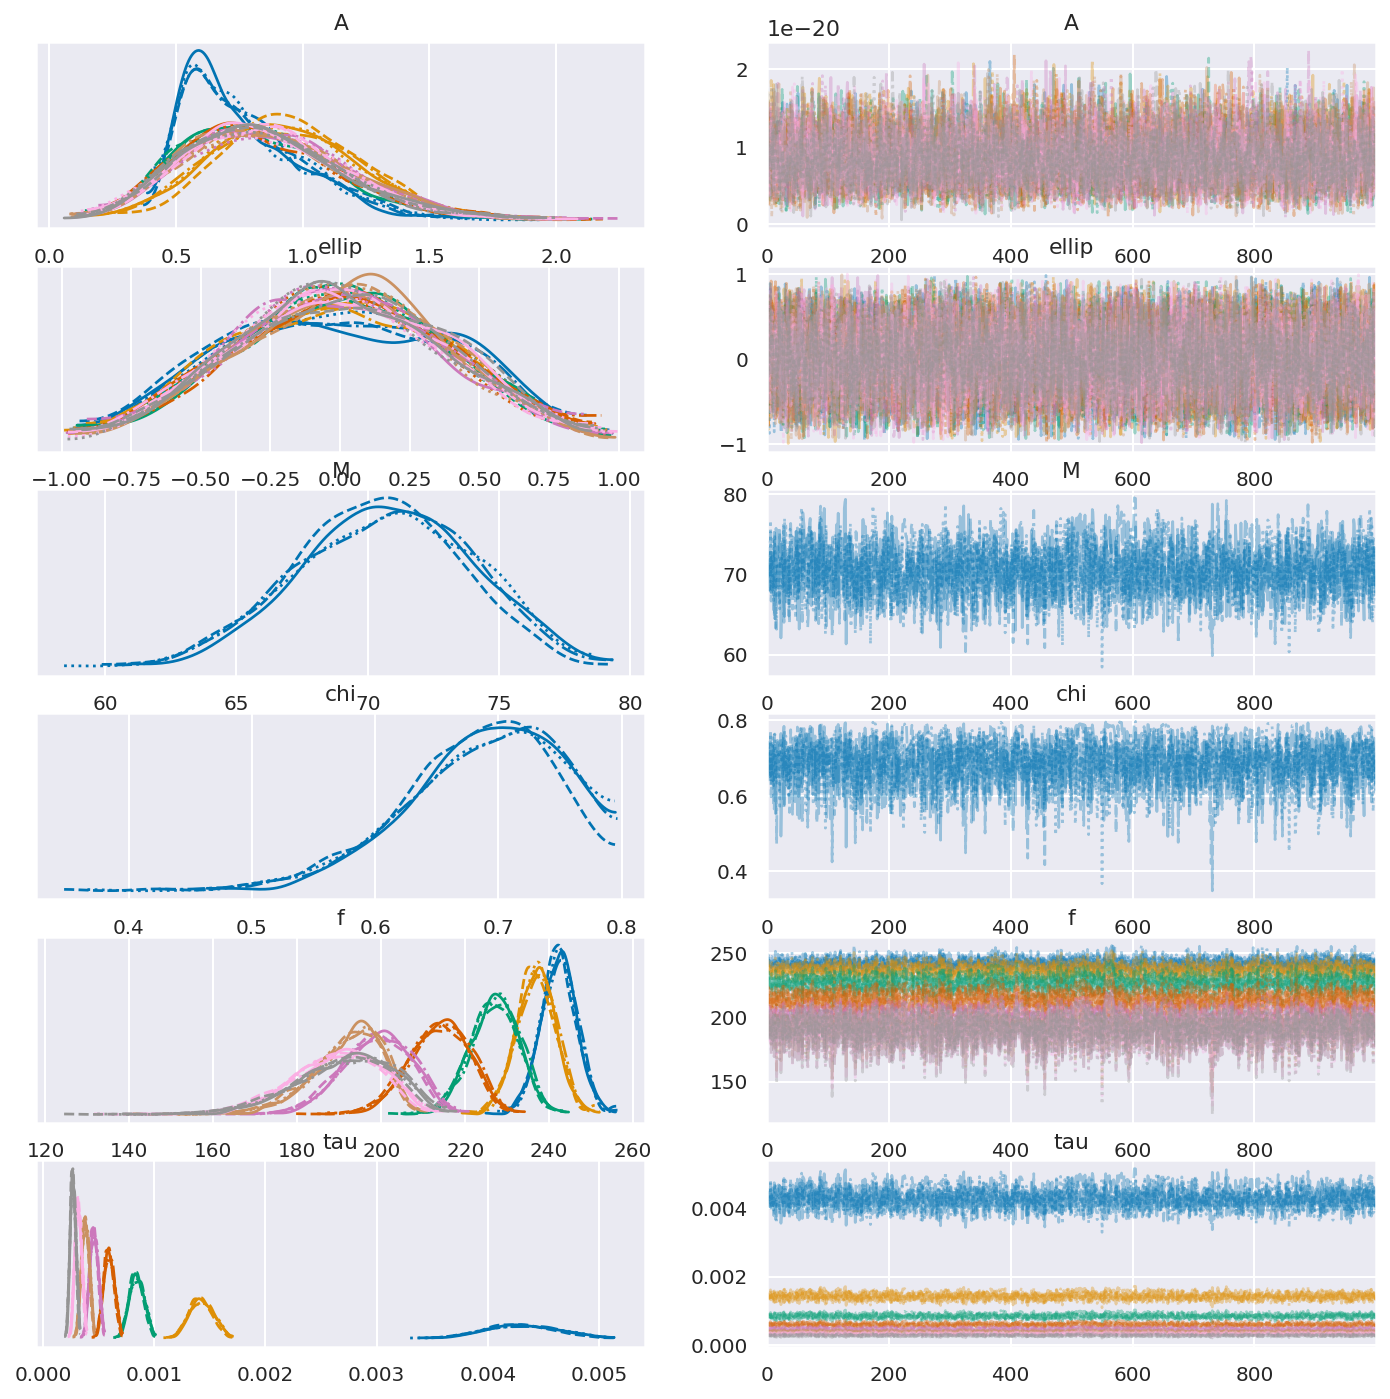

In [6]:
az.plot_trace(fit, var_names=['A', 'ellip', 'M', 'chi', 'f', 'tau'], compact=True);

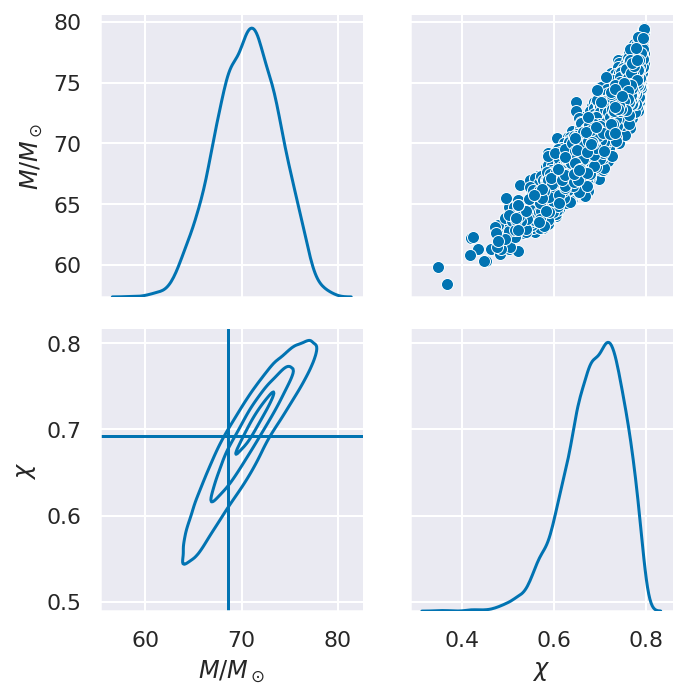

In [7]:
df = pd.DataFrame({
    r'$M / M_\odot$': fit.posterior.M.values.flatten(),
    r'$\chi$': fit.posterior.chi.values.flatten()
})
pg = sns.PairGrid(df, diag_sharey=False)
pg.map_diag(sns.kdeplot);
pg.map_upper(sns.scatterplot);
pg.map_lower(rd.kdeplot_2d_clevels, levels=[0.9, 0.5, 0.1]);

# plot true values
pg.axes[1,0].axvline(72*0.952)
pg.axes[1,0].axhline(0.692)